#KNN-WINE CLASSIFICATION MODEL

##UPLOAD FILE & UNZIP FILE

###Upload file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 9408623-b237fa5848349a14a14e5d4107dc7897c21951f5.zip to 9408623-b237fa5848349a14a14e5d4107dc7897c21951f5.zip


###Unzip file

In [ ]:
import zipfile
with zipfile.ZipFile('/content/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

##1. CHUẨN BỊ DỮ LIỆU

###Import thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

###Đọc file csv

In [ ]:
#đọc dữ liệu với pandas
path = '/content/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv'
df = pd.read_csv(path)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


###Xem các thành phần có trong dataset

In [ ]:
# các thành phần đánh giá
print("have", df.columns.size, " features")
print(df.columns)

have 14  features
Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


##Kiểm tra giá trị null có tồn tại?

In [ ]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

###Phân tích giá trị min, max, mean

In [ ]:
# Nhóm các dòng theo giá trị của cột Wine và tính toán giá trị min và max cho từng nhóm
grouped = df.groupby('Wine')
for wine, group in grouped:
    print(f"Wine {wine}:")
    print(f"  Alcohol: min={group['Alcohol'].min()}, max={group['Alcohol'].max()}")
    print(f"  Malic.acid: min={group['Malic.acid'].min()}, max={group['Malic.acid'].max()}")
    print(f"  Ash: min={group['Ash'].min()}, max={group['Ash'].max()}")
    print(f"  Acl: min={group['Acl'].min()}, max={group['Acl'].max()}")
    print(f"  Mg: min={group['Mg'].min()}, max={group['Mg'].max()}")
    print(f"  Phenols: min={group['Phenols'].min()}, max={group['Phenols'].max()}")
    print(f"  Flavanoids: min={group['Flavanoids'].min()}, max={group['Flavanoids'].max()}")
    print(f"  Nonflavanoid.phenols: min={group['Nonflavanoid.phenols'].min()}, max={group['Nonflavanoid.phenols'].max()}")
    print(f"  Proanth: min={group['Proanth'].min()}, max={group['Proanth'].max()}")
    print(f"  Color.int: min={group['Color.int'].min()}, max={group['Color.int'].max()}")
    print(f"  Hue: min={group['Hue'].min()}, max={group['Hue'].max()}")
    print(f"  OD: min={group['OD'].min()}, max={group['OD'].max()}")
    print(f"  Proline: min={group['Proline'].min()}, max={group['Proline'].max()}")
# Gía trị trung bing từng cột features
df.mean()

Wine 1:
  Alcohol: min=12.85, max=14.83
  Malic.acid: min=1.35, max=4.04
  Ash: min=2.04, max=3.22
  Acl: min=11.2, max=25.0
  Mg: min=89, max=132
  Phenols: min=2.2, max=3.88
  Flavanoids: min=2.19, max=3.93
  Nonflavanoid.phenols: min=0.17, max=0.5
  Proanth: min=1.25, max=2.96
  Color.int: min=3.52, max=8.9
  Hue: min=0.82, max=1.28
  OD: min=2.51, max=4.0
  Proline: min=680, max=1680
Wine 2:
  Alcohol: min=11.03, max=13.86
  Malic.acid: min=0.74, max=5.8
  Ash: min=1.36, max=3.23
  Acl: min=10.6, max=30.0
  Mg: min=70, max=162
  Phenols: min=1.1, max=3.52
  Flavanoids: min=0.57, max=5.08
  Nonflavanoid.phenols: min=0.13, max=0.66
  Proanth: min=0.41, max=3.58
  Color.int: min=1.28, max=6.0
  Hue: min=0.69, max=1.71
  OD: min=1.59, max=3.69
  Proline: min=278, max=985
Wine 3:
  Alcohol: min=12.2, max=14.34
  Malic.acid: min=1.24, max=5.65
  Ash: min=2.1, max=2.86
  Acl: min=17.5, max=27.0
  Mg: min=80, max=123
  Phenols: min=0.98, max=2.8
  Flavanoids: min=0.34, max=1.57
  Nonflavan

Wine                      1.938202
Alcohol                  13.000618
Malic.acid                2.336348
Ash                       2.366517
Acl                      19.494944
Mg                       99.741573
Phenols                   2.295112
Flavanoids                2.029270
Nonflavanoid.phenols      0.361854
Proanth                   1.590899
Color.int                 5.058090
Hue                       0.957449
OD                        2.611685
Proline                 746.893258
dtype: float64

###Xác định số label trong cột Wine

In [ ]:
unique_items = set(df['Wine']) # tạo ra một tập hợp mới chứa các phần tử duy nhất
num_unique_items = len(unique_items) # đếm số lượng nhãn trong tập hợp mới
print(num_unique_items, "label") # 1,2,3

3 label


###Đọc dữ liệu trên biểu đồ Boxplot

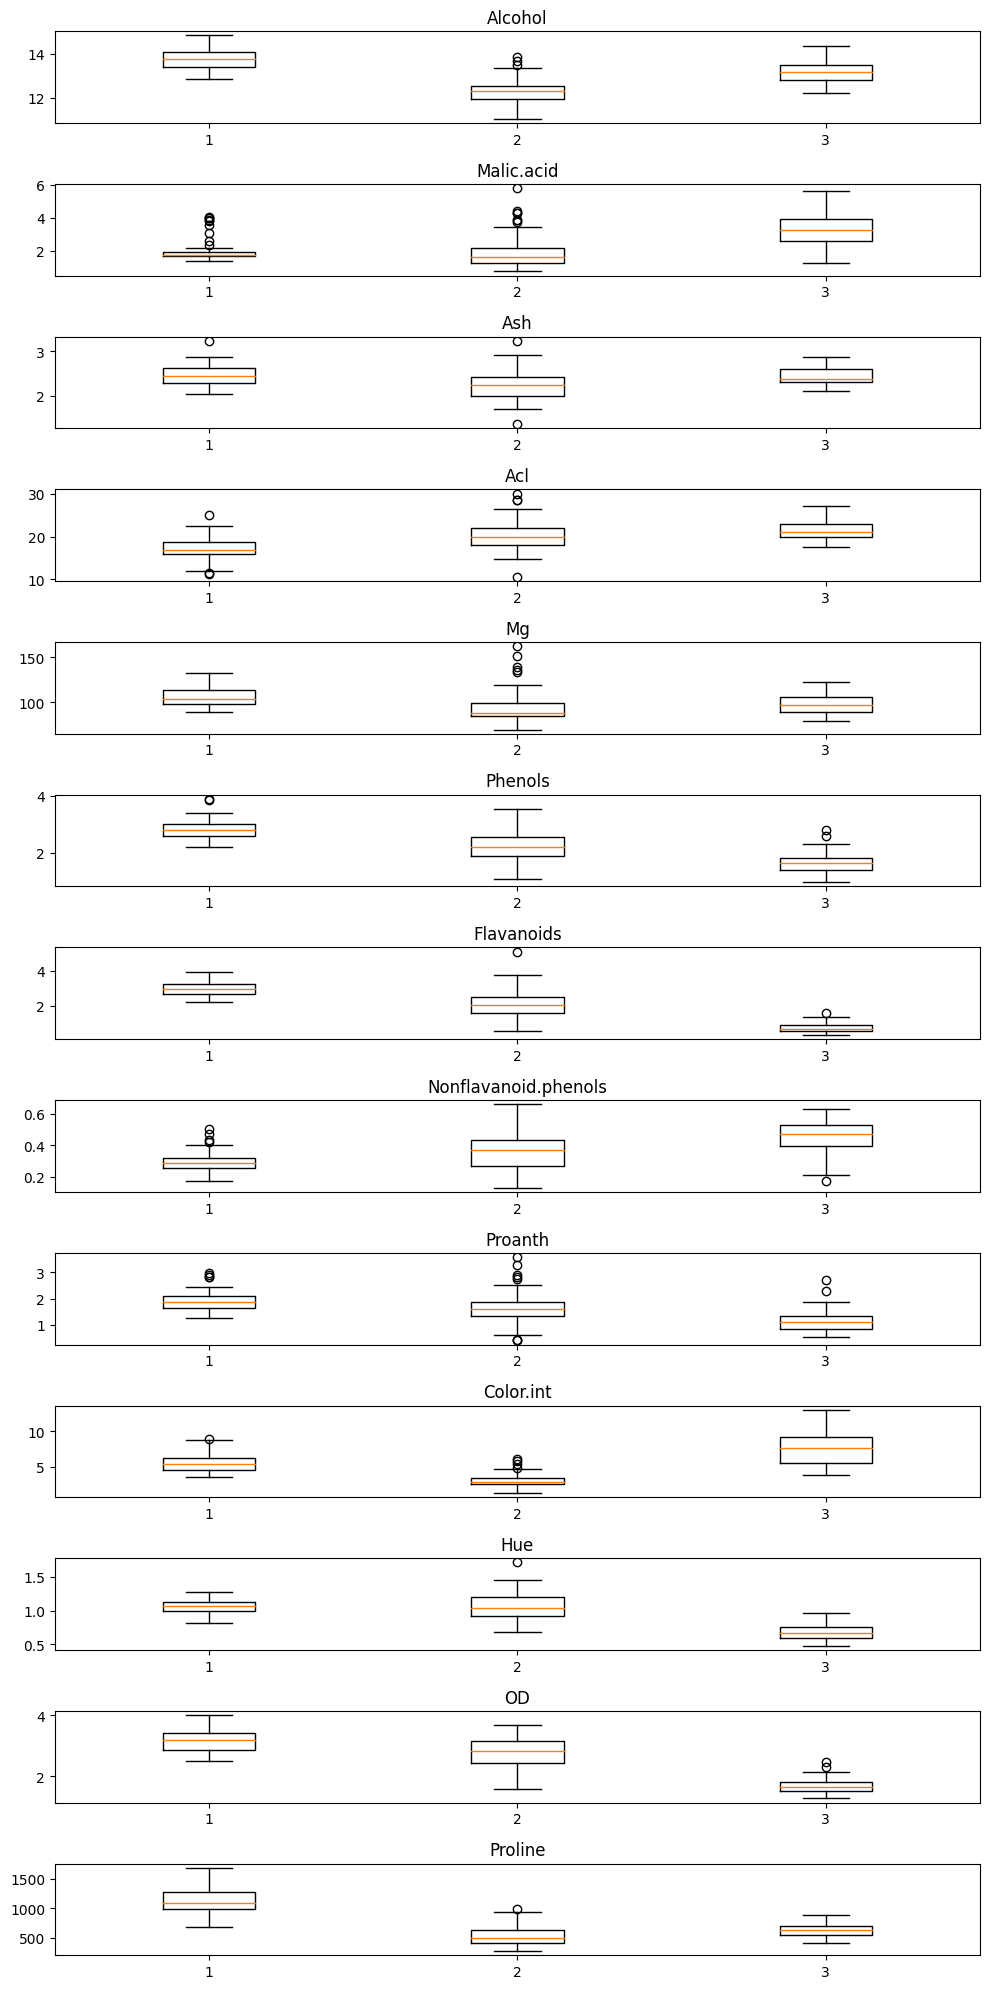

In [ ]:
# Tạo Box plot
fig, axs = plt.subplots(nrows=13, ncols=1, figsize=(10, 20))

for i, col in enumerate(df.columns[1:]):
    axs[i].boxplot([df.loc[df['Wine'] == 1, col],
                    df.loc[df['Wine'] == 2, col],
                    df.loc[df['Wine'] == 3, col]])
    axs[i].set_title(col)
    axs[i].set_xticklabels(['1', '2', '3'])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##2. TIỀN XỬ LÝ DỮ LIỆU

###Không cần phải làm sạch do bộ dữ liệu không có giá trị ngoại lai.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


##3. Thực hiện chương trình

###Trích chọn đặc trưng để phân loại

In [ ]:
# trích chọn đặc trưng để phân loại
X = df[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline']].values  # Lấy các cột feature1, feature2, ... làm đặc trưng
y = df['Wine'].values  # Lấy cột label làm nhãn
X.shape, y.shape, type(X), type(y)

((178, 13), (178,), numpy.ndarray, numpy.ndarray)

###Xác định các đặc trưng quan trọng nhất

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Tạo mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình với dữ liệu
rf.fit(X, y)

# Lấy độ quan trọng của các đặc trưng
importances = rf.feature_importances_

# Xác định các đặc trưng quan trọng nhất
important_features = []
for i in range(len(importances)):
    if importances[i] > 0.05:
        important_features.append(df.columns[i])

important_features

['Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Flavanoids',
 'Nonflavanoid.phenols']

###Chuẩn hóa dữ liệu

In [ ]:
# Chuẩn hóa dữ liệu || Quy đổi dữ liệu scale (link tham khảo https://www.ihoclaptrinh.com/thuan-toan-machine-learning-standardscaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

##4. XÂY DỰNG VÀ ĐÁNH GIÁ ĐỘ CHÍNH CỦA MÔ HÌNH KHI ÁP DỤNG PCA

###Mô hình KNN khi chưa sử dụng PCA

In [ ]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

# Áp dụng mô hình KNN để phân loại
knn = KNeighborsClassifier(n_neighbors=3) #metric = meanskowski
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Dữ liệu dự đoán
y_pred = knn.predict(X_test)
# Tính toán F1-score

# Đánh giá kết quả dự đoán
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9629629629629629
Precision: 0.9648574405607654
Recall: 0.9629629629629629
F1-score: 0.9622147399925177


###Mô hình KNN khi áp dụng PCA

####ÁP DỤNG THUẬT TOÁN PCA

In [ ]:
# Áp dụng PCA để giảm số chiều dữ liệu: (link tham khảo https://miai.vn/2021/04/22/principal-component-analysis-pca-tuyet-chieu-giam-chieu-du-lieu/)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [ ]:
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=32)

# Áp dụng mô hình KNN để phân loại
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Dữ liệu dự đoán
y_pred = knn.predict(X_test)
# Tính toán F1-score

# Đánh giá kết quả dự đoán
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9814814814814815
Precision: 0.982570806100218
Recall: 0.9814814814814815
F1-score: 0.9814633793128417


## Sử dụng các thang đo và tham số n láng giềng khác

In [ ]:
metrics_list = ['hamming', 'cosine', 'minkowski']
for metric_p in metrics_list:
    for i in range(3, 7):
        knn = KNeighborsClassifier(n_neighbors= 3, metric= metric_p).fit(X_train, y_train)
        print('with k = {}:'.format(i))
        print('Accuracy of model:', metrics.accuracy_score(y_train, knn.predict(X_train)))
        print('Test set Acc:', metrics.accuracy_score(y_test, knn.predict(X_test)))


with k = 3:
Accuracy of model: 0.25806451612903225
Test set Acc: 0.2962962962962963
with k = 4:
Accuracy of model: 0.25806451612903225
Test set Acc: 0.2962962962962963
with k = 5:
Accuracy of model: 0.25806451612903225
Test set Acc: 0.2962962962962963
with k = 6:
Accuracy of model: 0.25806451612903225
Test set Acc: 0.2962962962962963
with k = 3:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9629629629629629
with k = 4:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9629629629629629
with k = 5:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9629629629629629
with k = 6:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9629629629629629
with k = 3:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9814814814814815
with k = 4:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9814814814814815
with k = 5:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9814814814814815
with k = 6:
Accuracy of model: 0.9758064516129032
Test set Acc: 0.9814814814814815


##5. ĐÁNH GIÁ KHẢ NĂNG DỰ ĐOÁN CỦA MÔ HÌNH

###SỬ DỤNG MÔ HÌNH PHÂN LOẠI 1 MẪU MỚI

In [ ]:
new_sample = np.array([[12.0, 1.5, 2.3, 21.0, 90.0, 2.0, 2.5, 0.3, 1.5, 7.5, 0.9, 2.5, 600.0]])
# new_sample = np.array([[14.13,	4.10,	2.74,	24.5,	96,	2.05,	0.76,	0.56,	1.35,	9.20,	0.61,	1.60,	560]])
# Chuẩn hóa dữ liệu cho mẫu mới: Sử dụng đối tượng StandardScaler đã được huấn luyện trước đó để chuẩn hóa dữ liệu cho mẫu mới
new_sample_scaled = scaler.transform(new_sample)
# Giảm số chiều dữ liệu: Sử dụng đối tượng PCA đã được huấn luyện trước đó để giảm số chiều dữ liệu cho mẫu mới.
new_sample_pca = pca.transform(new_sample_scaled)
# Dự đoán kết quả: Sử dụng phương thức predict của mô hình KNN đã được huấn luyện trước đó để dự đoán kết quả cho mẫu mới.
new_sample_prediction = knn.predict(new_sample_pca)

# In kết quả: In kết quả dự đoán ra màn hình
print("Kết quả dự đoán cho mẫu mới:", new_sample_prediction)

Kết quả dự đoán cho mẫu mới: [2]
